<a href="https://colab.research.google.com/github/maciel88/Trabajo/blob/main/ModeloMachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MODELO DE MACHINE LEARNING PARA PREDECIR ENFERMEDADES EN EL CULTIVO DE LA PAPA

In [ ]:
#Se importan las siguientes librerías a usar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import metrics


In [ ]:
#Se accede a la ruta donde está ubicada el archivo
%cd '/content/drive/My Drive/Colab Notebooks'

/content/drive/My Drive/Colab Notebooks


Cargar base de datos

In [ ]:
# Se crea una variable data que contendrá la bases de datos
data=pd.read_csv("dataPrediction.csv")

In [ ]:
# Visualizamos la base de datos
data

,Temperatura,Humedad,Velocidad_viento,Direccion_viento,Visibilidad,Presion,Enfermedad,Enfermedad_por_numero
0,18.7,77,6.9,63,11.0,1015.5,Early Blight,1
1,23.4,64,4.6,137,8.9,1017.0,Late Blight,0
2,20.1,72,3.2,188,10.0,1014.8,Early Blight,1
3,25.6,61,7.1,282,9.6,1015.2,Late Blight,0
4,19.5,78,5.5,104,12.5,1016.1,Early Blight,1
...,...,...,...,...,...,...,...,...
4015,21.3,75,3.9,131,11.9,1015.6,Early Blight,1
4016,25.1,67,7.4,257,8.4,1016.0,Late Blight,0
4017,19.7,79,4.0,93,11.1,1014.5,Early Blight,1
4018,28.3,58,9.6,354,8.8,1015.4,Late Blight,0


In [ ]:
# información estadística del dataframe
data.describe()

,Temperatura,Humedad,Velocidad_viento,Direccion_viento,Visibilidad,Presion,Enfermedad_por_numero
count,4020.000000,4020.000000,4020.000000,4020.000000,4020.000000,4020.000000,4020.000000
mean,23.580249,67.247264,5.404602,184.280846,10.111443,1015.167040,0.513930
std,2.905305,6.814943,2.114070,89.812636,1.257829,0.595284,0.499868
min,17.500000,48.000000,1.200000,0.000000,6.900000,1012.600000,0.000000
25%,21.000000,61.000000,3.700000,118.000000,9.000000,1014.800000,0.000000
50%,23.400000,68.000000,5.100000,178.000000,9.900000,1015.200000,1.000000
75%,26.100000,73.000000,7.100000,258.000000,11.300000,1015.600000,1.000000
max,30.400000,83.000000,11.100000,358.000000,14.500000,1017.200000,1.000000


In [ ]:
# información general del dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4020 entries, 0 to 4019
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Temperatura            4020 non-null   float64
 1   Humedad                4020 non-null   int64  
 2   Velocidad_viento       4020 non-null   float64
 3   Direccion_viento       4020 non-null   int64  
 4   Visibilidad            4020 non-null   float64
 5   Presion                4020 non-null   float64
 6   Enfermedad             4020 non-null   object 
 7   Enfermedad_por_numero  4020 non-null   int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 251.4+ KB


In [ ]:
# información general de la cantidad de filas y columnas del dataframe
data.shape

(4020, 8)

In [ ]:
# información del contenido en la fila 960
data.loc[960]

Temperatura                      20.5
Humedad                            75
Velocidad_viento                  4.0
Direccion_viento                  128
Visibilidad                      11.4
Presion                        1014.9
Enfermedad               Early Blight
Enfermedad_por_numero               1
Name: 960, dtype: object

In [ ]:
data.loc[50]

Temperatura                      18.6
Humedad                            78
Velocidad_viento                  3.2
Direccion_viento                  182
Visibilidad                      12.8
Presion                        1015.5
Enfermedad               Early Blight
Enfermedad_por_numero               1
Name: 50, dtype: object

In [ ]:
data.loc[4000]

Temperatura                     28.1
Humedad                           59
Velocidad_viento                 9.3
Direccion_viento                 349
Visibilidad                      8.6
Presion                       1015.2
Enfermedad               Late Blight
Enfermedad_por_numero              0
Name: 4000, dtype: object

TRANSFORMACIÓN DE LOS DATOS

In [ ]:
# eliminamos la columna enfermedad por ser duplicado
data = data.drop(['Enfermedad'], axis=1)

Escalamiento

1.   Objetivo: Ajustar los datos para que estén dentro de un rango específico sin alterar su distribución.
2.   Método: Se realiza reescalando cada valor individual a una nueva escala utilizando una función que transforma los datos de manera lineal.

In [ ]:
#creamos una instancia del objeto MinMaxScaler()
scaler = MinMaxScaler()
# creamos una variable datos_escalamiento, establecemos las columnas a escalar
datos_escalamiento = scaler.fit_transform(data[['Temperatura','Humedad','Velocidad_viento','Direccion_viento','Visibilidad','Presion']])
# establecemos el dataframe datos_escalamiento con los nombres de las columnas originales
datos_escalamiento = pd.DataFrame(datos_escalamiento, columns =['Temperatura','Humedad','Velocidad_viento','Direccion_viento','Visibilidad','Presion'])
# La columna 'Enfermedad_por_numero' del DataFrame original 'data' se agrega al DataFrame escalado 'datos_escalamiento'
datos_escalamiento['Enfermedad_por_numero'] = data['Enfermedad_por_numero']

In [ ]:
datos_escalamiento

,Temperatura,Humedad,Velocidad_viento,Direccion_viento,Visibilidad,Presion,Enfermedad_por_numero
0,0.093023,0.828571,0.575758,0.175978,0.539474,0.630435,1
1,0.457364,0.457143,0.343434,0.382682,0.263158,0.956522,0
2,0.201550,0.685714,0.202020,0.525140,0.407895,0.478261,1
3,0.627907,0.371429,0.595960,0.787709,0.355263,0.565217,0
4,0.155039,0.857143,0.434343,0.290503,0.736842,0.760870,1
...,...,...,...,...,...,...,...
4015,0.294574,0.771429,0.272727,0.365922,0.657895,0.652174,1
4016,0.589147,0.542857,0.626263,0.717877,0.197368,0.739130,0
4017,0.170543,0.885714,0.282828,0.259777,0.552632,0.413043,1
4018,0.837209,0.285714,0.848485,0.988827,0.250000,0.608696,0


Normalización


1.   Objetivo: Transformar los datos para que estén en un rango específico, generalmente entre 0 y 1.

2.   Método: Se aplica una transformación lineal para ajustar los datos dentro del rango deseado.



In [ ]:
scaler = MinMaxScaler()
datos_normalizacion = scaler.fit_transform(data[['Temperatura','Humedad','Velocidad_viento','Direccion_viento','Visibilidad','Presion']])
datos_normalizacion = pd.DataFrame(datos_normalizacion, columns =['Temperatura','Humedad','Velocidad_viento','Direccion_viento','Visibilidad','Presion'])
datos_normalizacion['Enfermedad_por_numero'] = data['Enfermedad_por_numero']
datos_normalizacion

,Temperatura,Humedad,Velocidad_viento,Direccion_viento,Visibilidad,Presion,Enfermedad_por_numero
0,0.093023,0.828571,0.575758,0.175978,0.539474,0.630435,1
1,0.457364,0.457143,0.343434,0.382682,0.263158,0.956522,0
2,0.201550,0.685714,0.202020,0.525140,0.407895,0.478261,1
3,0.627907,0.371429,0.595960,0.787709,0.355263,0.565217,0
4,0.155039,0.857143,0.434343,0.290503,0.736842,0.760870,1
...,...,...,...,...,...,...,...
4015,0.294574,0.771429,0.272727,0.365922,0.657895,0.652174,1
4016,0.589147,0.542857,0.626263,0.717877,0.197368,0.739130,0
4017,0.170543,0.885714,0.282828,0.259777,0.552632,0.413043,1
4018,0.837209,0.285714,0.848485,0.988827,0.250000,0.608696,0


Estandarización

Objetivo: Transformar los datos para que tengan una media de 0 y una desviación estándar de 1, es decir, seguir una distribución normal (Gaussiana).




In [ ]:
scaler = StandardScaler()
datos_estandarizacion = scaler.fit_transform(data[['Temperatura','Humedad','Velocidad_viento','Direccion_viento','Visibilidad','Presion']])
datos_estandarizacion = pd.DataFrame(datos_estandarizacion, columns =['Temperatura','Humedad','Velocidad_viento','Direccion_viento','Visibilidad','Presion'])
datos_estandarizacion['Enfermedad_por_numero'] = data['Enfermedad_por_numero']
datos_estandarizacion

,Temperatura,Humedad,Velocidad_viento,Direccion_viento,Visibilidad,Presion,Enfermedad_por_numero
0,-1.679980,1.431259,0.707443,-1.350544,0.706509,0.559400,1
1,-0.062049,-0.476551,-0.380641,-0.526504,-0.963242,3.079521,0
2,-1.198043,0.697486,-1.042953,0.041415,-0.088610,-0.616657,1
3,0.695281,-0.916815,0.802059,1.088169,-0.406658,0.055376,0
4,-1.404588,1.578014,0.045131,-0.893981,1.899189,1.567448,1
...,...,...,...,...,...,...,...
4015,-0.784954,1.137750,-0.711797,-0.593318,1.422117,0.727408,1
4016,0.523160,-0.036287,0.943983,0.809777,-1.360802,1.399440,0
4017,-1.335740,1.724768,-0.664489,-1.016474,0.786021,-1.120681,1
4018,1.624731,-1.357079,1.984759,1.889937,-1.042754,0.391392,0


MODELADO

In [ ]:
#Separación de datos para el modelo
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
# Seleccionamos el dataframe con el que trabajaremos
# Definimos las variables predictoras o independientes, en este caso X contendrá todas la columnas excepto la columna 'enfermedad_por_numero'
X = data.drop('Enfermedad_por_numero',axis=1).to_numpy().astype(float)
# Y es la variable a predecir o dependiente, en este caso la columna 'Enfermedad_por_numero'
Y = data['Enfermedad_por_numero']
Y = LabelEncoder().fit_transform(Y).astype(float)
# X_train: Las características de entrenamiento que se utilizarán para entrenar tu modelo.
# X_test: Las características de prueba que se utilizarán para evaluar el rendimiento del modelo.
# Y_train: Los valores objetivo correspondientes a X_train, utilizados para entrenar el modelo.
# Y_test: Los valores objetivo correspondientes a X_test, utilizados para evaluar el rendimiento del modelo.
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.3, random_state = 42, shuffle=True)
# imprime los valores de entrenamiento y prueba
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((2814, 6), (1206, 6), (2814,), (1206,))

EVALUACIÓN DE ALGORITMOS

In [ ]:
### REGRESIÓN LOGÍSTICA VALIDACIÓN CRUZADA
from sklearn.linear_model import LogisticRegression

model_logistic = LogisticRegression()
model_logistic.fit(X_train, Y_train)
acc_log_train = round(model_logistic.score(X_train, Y_train)*100,2)
acc_log_test = round(model_logistic.score(X_test, Y_test)*100,2)
print('Precisión: {} %'.format(acc_log_test))

Precisión: 97.6 %


In [ ]:
#REGRESIÓN LOGÍSTICA CON VALIDACIÓN CRUZADA
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
k_fold= KFold(n_splits = 10, shuffle=True, random_state=42)
val_cruz = cross_val_score(LogisticRegression(solver='lbfgs', max_iter=1000),X,
                           Y, scoring='accuracy', cv=k_fold)
print(f'Precisión: {val_cruz.mean()*100.0:,.2f}% ({val_cruz.std()*100.0:,.2f}%)')

Precisión: 97.06% (0.85%)


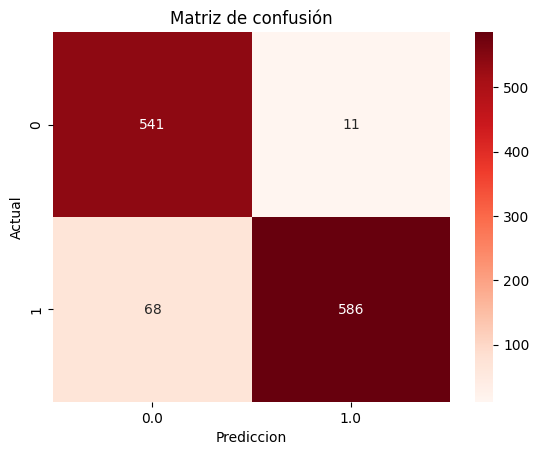

In [ ]:
#MATRIZ DE CONFUSIÓN PARA MODELO DE REGRESIÓN LOGÍSTICA
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
probs = model_logistic.predict_proba(X_test)
prob = probs[:,1]
prob_df=pd.DataFrame(prob)
threshold = 0.15
prob_df['prediccion']=np.where(prob_df[0]>=threshold,1,0)
prob_df['actual'] =np.array(Y_test)
confusion_matrix = pd.crosstab(prob_df.prediccion,prob_df.actual)

# mostrar en un mapa de calor
sns.heatmap(confusion_matrix, annot=True, cmap='Reds', fmt='d')
plt.xlabel('Prediccion')
plt.ylabel('Actual')
plt.title('Matriz de confusión')
plt.show()

Sensibilidad: 0.981574539363484 
Especificidad: 0.11165845648604267 


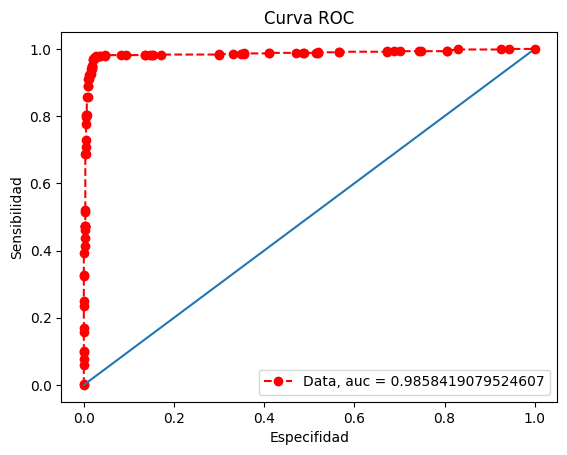

In [ ]:
# CÁLCULO DE LA SENSIBILIDAD Y ESPECIFICIDAD
# VP=Verdaderos positivos, VN = Verdaderos negativos, FP = Falsos positivos , FN = Falsos negativos
VN = confusion_matrix[0][0]
VP = confusion_matrix[1][1]
FP = confusion_matrix[0][1]
FN = confusion_matrix[1][0]

sens = VP/(VP+FN)
espc = 1-VN/(VN+FP)
print("Sensibilidad: {} ".format(sens))
print("Especificidad: {} ".format(espc))

#GRAFICAMOS LA CURVA ROC (Receiver Operating Characteristic)
espc, sens, _ = metrics.roc_curve(Y_test,prob)
%matplotlib inline
auc = metrics.auc(espc, sens)
plt.plot(espc, sens, marker = 'o', linestyle = '--', color = 'r', label = 'Data, auc = '+str(auc))
x = [i*0.01 for i in range(100)]
y = [i*0.01 for i in range(100)]
plt.plot(x,y)
plt.xlabel('Especifidad')
plt.ylabel('Sensibilidad')
plt.title('Curva ROC')
plt.legend(loc=4)

In [ ]:
# K Vecinos cercanos
from sklearn.neighbors import KNeighborsClassifier
model_neigh = KNeighborsClassifier()
model_neigh.fit(X_train, Y_train)
print('Precisión: {} %'.format(round(model_neigh.score(X_train, Y_train)*100,2)))

Precisión: 97.05 %


In [ ]:
# k vecinos cercanos con cross validation
val_cruz_kn = cross_val_score(KNeighborsClassifier(),X,
                           Y, scoring='accuracy', cv=k_fold)
print(f'Precisión: {val_cruz_kn.mean()*100.0:,.2f}%')

Precisión: 96.72%


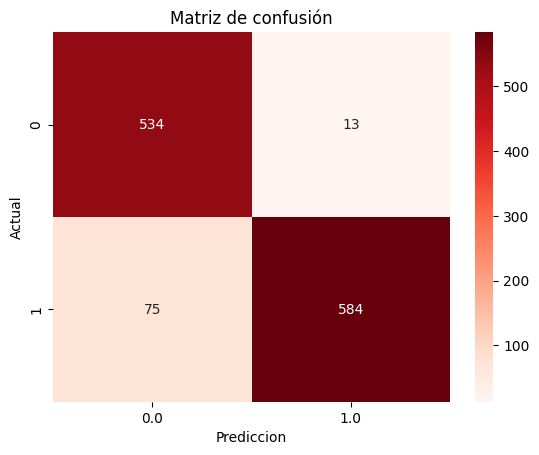

In [ ]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
probs = model_neigh.predict_proba(X_test)
prob = probs[:,1]
prob_df=pd.DataFrame(prob)
threshold = 0.15
prob_df['prediccion']=np.where(prob_df[0]>threshold,1,0)
prob_df['actual'] =np.array(Y_test)
confusion_matrix_kn = pd.crosstab(prob_df.prediccion,prob_df.actual)

# mostrar en un mapa de calor
sns.heatmap(confusion_matrix_kn, annot=True, cmap='Reds', fmt='d')
plt.xlabel('Prediccion')
plt.ylabel('Actual')
plt.title('Matriz de confusión')
plt.show()

Sensibilidad: 0.9782244556113903 
Especificidad: 0.12315270935960587 


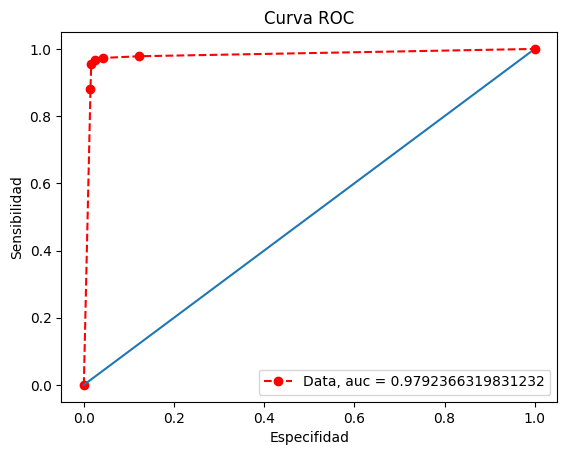

In [ ]:
# CÁLCULO DE LA SENSIBILIDAD Y ESPECIFICIDAD
# VP=Verdaderos positivos, VN = Verdaderos negativos, FP = Falsos positivos , FN = Falsos negativos
VN = confusion_matrix_kn[0][0]
VP = confusion_matrix_kn[1][1]
FP = confusion_matrix_kn[0][1]
FN = confusion_matrix_kn[1][0]
sens_1 = VP/(VP+FN)
espc_1 = 1-VN/(VN+FP)
print("Sensibilidad: {} ".format(sens_1))
print("Especificidad: {} ".format(espc_1))

#GRAFICAMOS LA CURVA ROC (Receiver Operating Characteristic)
espc_1, sens_1, _ = metrics.roc_curve(Y_test,prob)
%matplotlib inline
auc = metrics.auc(espc_1, sens_1)
plt.plot(espc_1, sens_1, marker = 'o', linestyle = '--', color = 'r', label = 'Data, auc = '+str(auc))
x = [i*0.01 for i in range(100)]
y = [i*0.01 for i in range(100)]
plt.plot(x,y)
plt.xlabel('Especifidad')
plt.ylabel('Sensibilidad')
plt.title('Curva ROC')
plt.legend(loc=4)

In [ ]:
# Máquina de vector de soporte
from sklearn.svm import SVC
model_svc = SVC(probability=True)
model_svc.fit(X_train, Y_train)
print('Precisión: {} %'.format(round(model_svc.score(X_train, Y_train)*100,2)))

Precisión: 85.11 %


In [ ]:
# Máquina de vector de soporte con cross validation
val_cruz_svc = cross_val_score(SVC(),X,
                           Y, scoring='accuracy', cv=k_fold)
print(f'Precisión: {val_cruz_svc.mean()*100.0:,.2f}%')

Precisión: 84.88%


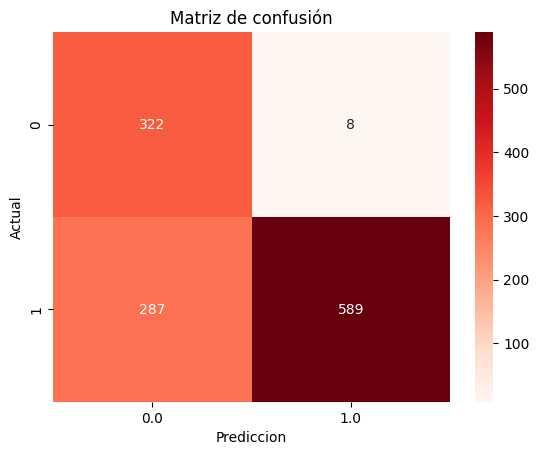

In [ ]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
probs = model_svc.predict_proba(X_test)
prob = probs[:,1]
prob_df=pd.DataFrame(prob)
threshold = 0.15
prob_df['prediccion']=np.where(prob_df[0]>threshold,1,0)
prob_df['actual'] =np.array(Y_test)
confusion_matrix_svc = pd.crosstab(prob_df.prediccion,prob_df.actual)

# mostrar en un mapa de calor
sns.heatmap(confusion_matrix_svc, annot=True, cmap='Reds', fmt='d')
plt.xlabel('Prediccion')
plt.ylabel('Actual')
plt.title('Matriz de confusión')
plt.show()

Sensibilidad: 0.9865996649916248 
Especificidad: 0.47126436781609193 


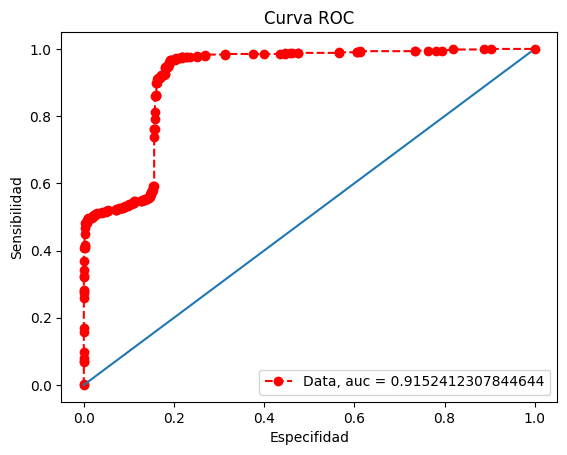

In [ ]:
# CÁLCULO DE LA SENSIBILIDAD Y ESPECIFICIDAD
# VP=Verdaderos positivos, VN = Verdaderos negativos, FP = Falsos positivos , FN = Falsos negativos
VN = confusion_matrix_svc[0][0]
VP = confusion_matrix_svc[1][1]
FP = confusion_matrix_svc[0][1]
FN = confusion_matrix_svc[1][0]
sens_2 = VP/(VP+FN)
espc_2 = 1-VN/(VN+FP)
print("Sensibilidad: {} ".format(sens_2))
print("Especificidad: {} ".format(espc_2))

#GRAFICAMOS LA CURVA ROC (Receiver Operating Characteristic)
espc_2, sens_2, _ = metrics.roc_curve(Y_test,prob)
%matplotlib inline
auc = metrics.auc(espc_2, sens_2)
plt.plot(espc_2, sens_2, marker = 'o', linestyle = '--', color = 'r', label = 'Data, auc = '+str(auc))
x = [i*0.01 for i in range(100)]
y = [i*0.01 for i in range(100)]
plt.plot(x,y)
plt.xlabel('Especifidad')
plt.ylabel('Sensibilidad')
plt.title('Curva ROC')
plt.legend(loc=4)

In [ ]:
# Árbol de decisión
from sklearn.tree import DecisionTreeClassifier
model_tree = DecisionTreeClassifier()
model_tree.fit(X_train, Y_train)
print('Precisión: {} %'.format(round(model_tree.score(X_train, Y_train)*100,2)))

Precisión: 99.64 %


In [ ]:
# Árbol de decisión con cross validation
val_cruz_tree = cross_val_score(DecisionTreeClassifier(),X,
                           Y, scoring='accuracy', cv=k_fold)
print(f'Precisión: {val_cruz_tree.mean()*100.0:,.2f}%')

Precisión: 95.20%


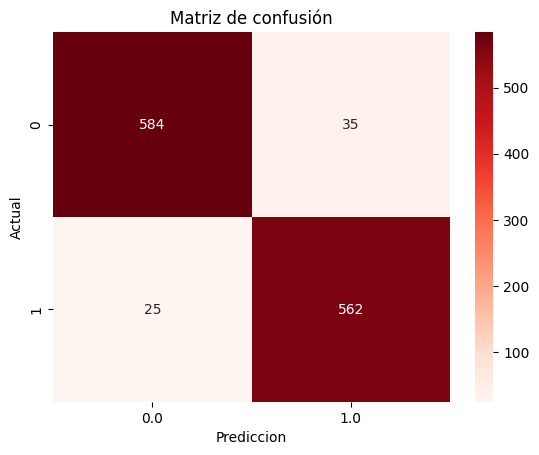

In [ ]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
probs = model_tree.predict_proba(X_test)
prob = probs[:,1]
prob_df=pd.DataFrame(prob)
threshold = 0.15
prob_df['prediccion']=np.where(prob_df[0]>threshold,1,0)
prob_df['actual'] =np.array(Y_test)
confusion_matrix_mt = pd.crosstab(prob_df.prediccion,prob_df.actual)

# mostrar en un mapa de calor
sns.heatmap(confusion_matrix_mt, annot=True, cmap='Reds', fmt='d')
plt.xlabel('Prediccion')
plt.ylabel('Actual')
plt.title('Matriz de confusión')
plt.show()

Sensibilidad: 0.9413735343383585 
Especificidad: 0.04105090311986859 


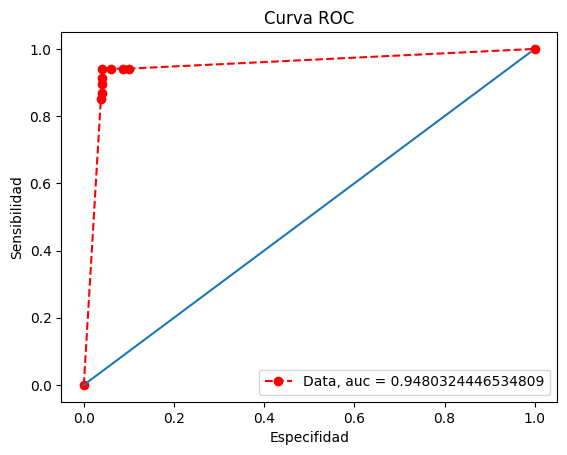

In [ ]:
# CÁLCULO DE LA SENSIBILIDAD Y ESPECIFICIDAD
# VP=Verdaderos positivos, VN = Verdaderos negativos, FP = Falsos positivos , FN = Falsos negativos
VN = confusion_matrix_mt[0][0]
VP = confusion_matrix_mt[1][1]
FP = confusion_matrix_mt[0][1]
FN = confusion_matrix_mt[1][0]
sens_3 = VP/(VP+FN)
espc_3 = 1-VN/(VN+FP)
print("Sensibilidad: {} ".format(sens_3))
print("Especificidad: {} ".format(espc_3))

#GRAFICAMOS LA CURVA ROC (Receiver Operating Characteristic)
espc_3, sens_3, _ = metrics.roc_curve(Y_test,prob)
%matplotlib inline
auc = metrics.auc(espc_3, sens_3)
plt.plot(espc_3, sens_3, marker = 'o', linestyle = '--', color = 'r', label = 'Data, auc = '+str(auc))
x = [i*0.01 for i in range(100)]
y = [i*0.01 for i in range(100)]
plt.plot(x,y)
plt.xlabel('Especifidad')
plt.ylabel('Sensibilidad')
plt.title('Curva ROC')
plt.legend(loc=4)

In [ ]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
model_naive = GaussianNB()
model_naive.fit(X_train, Y_train)
print('Precisión: {} %'.format(round(model_naive.score(X_train, Y_train)*100,2)))

Precisión: 96.38 %


In [ ]:
# Naive Bayes con cross validation
val_cruz_naive = cross_val_score(GaussianNB(),X,
                           Y, scoring='accuracy', cv=k_fold)
print(f'Precisión: {val_cruz_naive.mean()*100.0:,.2f}%')

Precisión: 96.69%


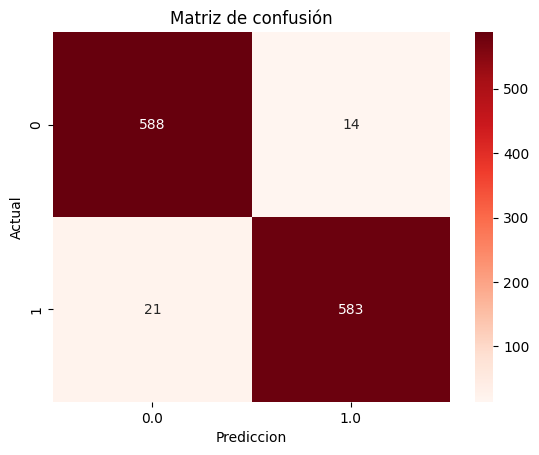

In [ ]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
probs = model_naive.predict_proba(X_test)
prob = probs[:,1]
prob_df=pd.DataFrame(prob)
threshold = 0.15
prob_df['prediccion']=np.where(prob_df[0]>threshold,1,0)
prob_df['actual'] =np.array(Y_test)
confusion_matrix_nb = pd.crosstab(prob_df.prediccion,prob_df.actual)

# mostrar en un mapa de calor
sns.heatmap(confusion_matrix_nb, annot=True, cmap='Reds', fmt='d')
plt.xlabel('Prediccion')
plt.ylabel('Actual')
plt.title('Matriz de confusión')
plt.show()

Sensibilidad: 0.9765494137353434 
Especificidad: 0.03448275862068961 


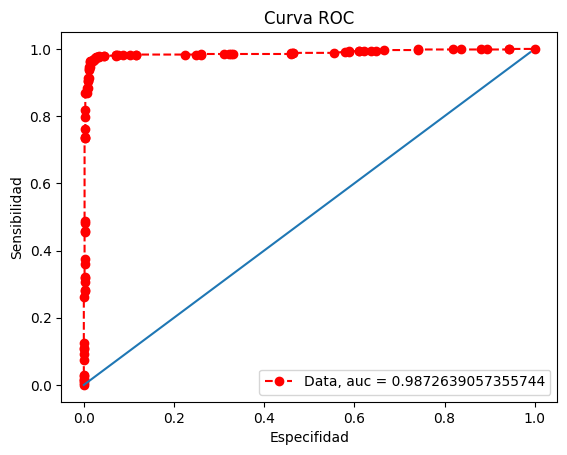

In [ ]:
# CÁLCULO DE LA SENSIBILIDAD Y ESPECIFICIDAD
# VP=Verdaderos positivos, VN = Verdaderos negativos, FP = Falsos positivos , FN = Falsos negativos
VN = confusion_matrix_nb[0][0]
VP = confusion_matrix_nb[1][1]
FP = confusion_matrix_nb[0][1]
FN = confusion_matrix_nb[1][0]
sens_4 = VP/(VP+FN)
espc_4 = 1-VN/(VN+FP)
print("Sensibilidad: {} ".format(sens_4))
print("Especificidad: {} ".format(espc_4))

#GRAFICAMOS LA CURVA ROC (Receiver Operating Characteristic)
espc_4, sens_4, _ = metrics.roc_curve(Y_test,prob)
%matplotlib inline
auc = metrics.auc(espc_4, sens_4)
plt.plot(espc_4, sens_4, marker = 'o', linestyle = '--', color = 'r', label = 'Data, auc = '+str(auc))
x = [i*0.01 for i in range(100)]
y = [i*0.01 for i in range(100)]
plt.plot(x,y)
plt.xlabel('Especifidad')
plt.ylabel('Sensibilidad')
plt.title('Curva ROC')
plt.legend(loc=4)

PRUEBA DEL MODELO CON EL ALGORITMO CON MAYOR PRECISIÓN

In [ ]:
#PRUEBA DEL MODELO DE PREDICCIÓN CON LOGISTIC REGRESSION
value_to_predict = X[960]
result=model_logistic.predict([value_to_predict])
if result[0]==1:
  print('{} : Si tiene enfermedad inicial'.format(result[0]))
else:
  print('{} : Planta sin enfermedad'.format(result[0]))

NameError: ignored

In [ ]:
#PRUEBA DEL MODELO DE PREDICCIÓN CON LOGISTIC REGRESSION
value_to_predict = X[50]
result=model_logistic.predict([value_to_predict])
if result[0]==1:
  print('{} : Planta con enfermedad'.format(result[0]))
else:
  print('{} : Planta sin enfermedad'.format(result[0]))

1.0 : Planta con enfermedad


In [ ]:
#PRUEBA DEL MODELO DE PREDICCIÓN CON LOGISTIC REGRESSION
value_to_predict = X[4000]
result=model_logistic.predict([value_to_predict])
if result[0]==1:
  print('{} : Planta con enfermedad'.format(result[0]))
else:
  print('{} : Planta sin enfermedad'.format(result[0]))

0.0 : Planta sin enfermedad
